In [3]:
import random
import functools
import timeit
import typing
import matplotlib.pyplot as plt
import numpy as np

In [4]:
vec = [random.randint(1, 1000) for _ in range(0, 19 * (10 ** 5))]


def HOPE1(vec: list):
    return sum(vec)

def HOPE2(vec: list):
    return np.prod(vec)

def HOPE3(vec: list, x: float = 14 * 1.5):
    result = 0
    for i in range(len(vec), 0, -1):
        result = result * x + vec[i - 1]
    return result

def HOPE4(vec: list):
    max = vec[0]
    for item in vec[1:]:
        if item > max:
            max = item
    return max

def HOPE5(vec: list[int]) -> float:
    return sum(vec) / len(vec)


def get_usage_time(
        *, number: int = 1, setup: str = 'pass', ndigits: int = 3
) -> typing.Callable:
    def decorator(func: typing.Callable) -> typing.Callable:
        @functools.wraps(func)
        def wrapper(*args, **kwargs) -> float:
            usage_time = timeit.timeit(
                lambda: func(*args, **kwargs),
                setup=setup,
                number=number,
            )
            return round(usage_time / number, ndigits)

        return wrapper

    return decorator



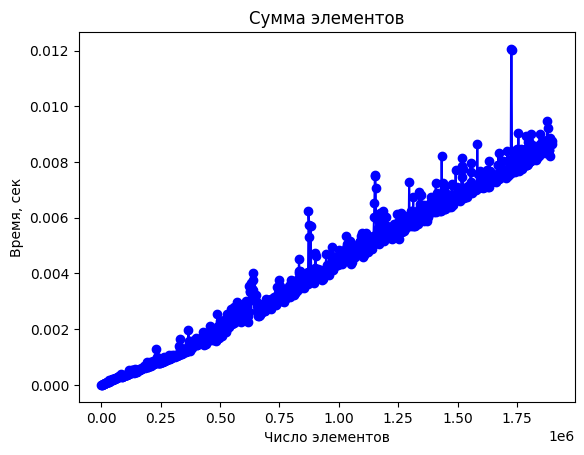

In [3]:
N = 19
func = get_usage_time(ndigits=5, number=5)(HOPE1)
items = [i for i in range(1, len(vec), 1900)]
times = [func(vec[:i]) for i in items]

fig = plt.plot(items, times, 'bo-')
plt.title('Сумма элементов')
ax = plt.gca()
ax.set_xlabel('Число элементов')
ax.set_ylabel('Время, сек')
plt.show()

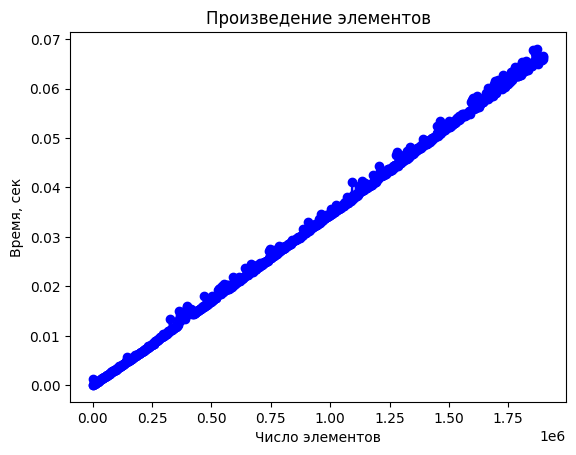

In [4]:
N = 19
func = get_usage_time(ndigits=5, number=5)(HOPE2)
items = [i for i in range(1, len(vec), 1900)]
times = [func(vec[:i]) for i in items]

fig = plt.plot(items, times, 'bo-')
plt.title('Произведение элементов')
ax = plt.gca()
ax.set_xlabel('Число элементов')
ax.set_ylabel('Время, сек')
plt.show()

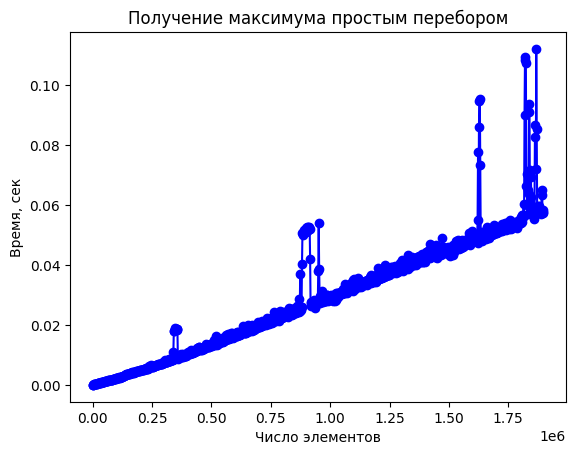

In [9]:
N = 19
func = get_usage_time(ndigits=5, number=5)(HOPE4)
items = [i for i in range(1, len(vec), 1900)]
times = [func(vec[:i]) for i in items]

fig = plt.plot(items, times, 'bo-')
plt.title('Получение максимума простым перебором')
ax = plt.gca()
ax.set_xlabel('Число элементов')
ax.set_ylabel('Время, сек')
plt.show()

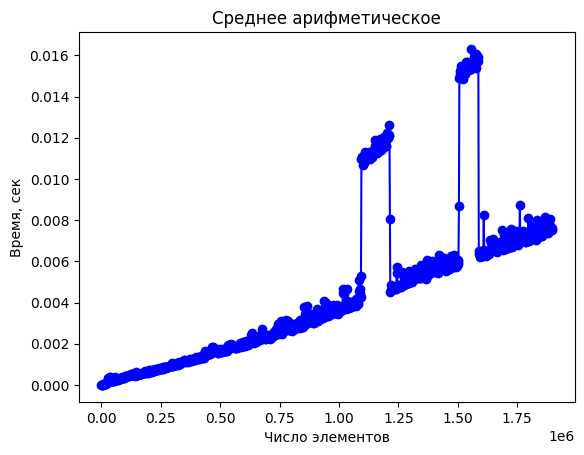

In [11]:
N = 19
func = get_usage_time(ndigits=5, number=5)(HOPE5)
items = [i for i in range(1, len(vec), 1900)]
times = [func(vec[:i]) for i in items]

fig = plt.plot(items, times, 'bo-')
plt.title('Среднее арифметическое')
ax = plt.gca()
ax.set_xlabel('Число элементов')
ax.set_ylabel('Время, сек')
plt.show()

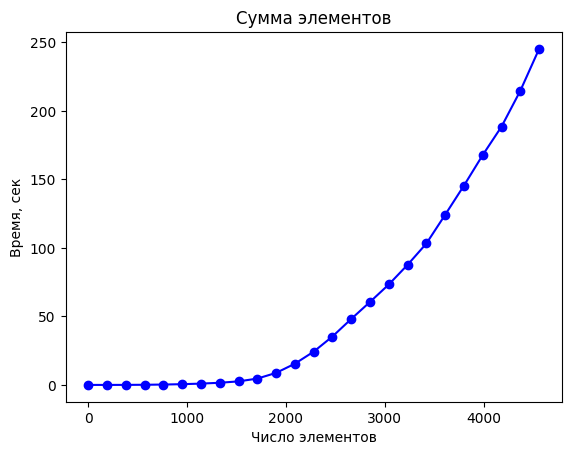

In [14]:
def create_matrix(n: int) -> np.array:
    result = np.array([[random.randint(0, 1000) for j in range(n)] for i in range(n)])
    return result

def matrix_multiplicathion(A, B):
    return np.dot(A, B)

N = 19
count = range(1, 250 * N, 10 * N)
matrix_A = create_matrix(250*N)
matrix_B = create_matrix(250*N)
func = get_usage_time(ndigits=5)(matrix_multiplicathion)
items = [i for i in count]
times = [func(matrix_A[:i, :i], matrix_B[:i, :i]) for i in items]

fig = plt.plot(items, times, 'bo-')
plt.title('Сумма элементов')
ax = plt.gca()
ax.set_xlabel('Число элементов')
ax.set_ylabel('Время, сек')
plt.show()

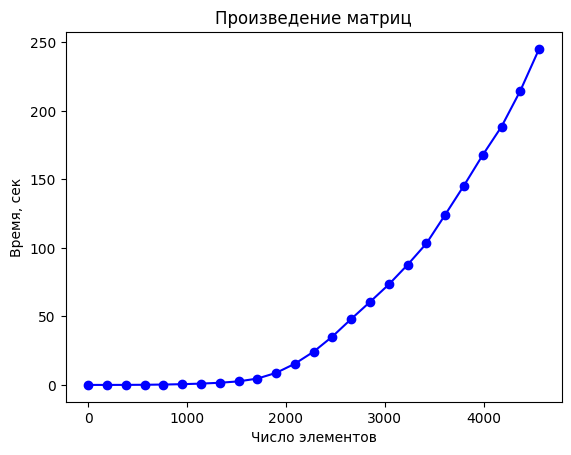

In [16]:
fig = plt.plot(items, times, 'bo-')
plt.title('Произведение матриц')
ax = plt.gca()
ax.set_xlabel('Число элементов')
ax.set_ylabel('Время, сек')
plt.show()

<h2>Ответы на вопросы</h2>

---

1. Временная сложность – это характеристика алгоритма, призванная давать представление о количестве времени, требуемом для работы алгоритма на определенном объеме данных. 
Оценка временной сложности алгоритма [1, 2, 4] осуществляется путем подсчета количества элементарных операций (сложений, умножений и т.д.), выполняемых алгоритмом для заданного объема данных. 
При этом предполагается, что выполнение каждой элементарной операции требует фиксированного количества времени.
В связи с тем, что время работы алгоритма может быть различно для данных разного объема, временную сложность принято определять
с помощью функции $T$ , отражающей зависимость времени работы алгоритма $T(n)$ от объема $n$ входных данных. 
При этом особое внимание уделается асимптотическому поведению $T(n)$ при $n \to \infty$. 
    
2. Для того, чтобы все-таки получить представление о временной сложности алгоритма, можно применять эмпирический подход [1].
Он состоит в проведении серии замеров времени работы алгоритма при изменении объема входных данных. 
Например, для алгоритма, принимающего на вход векторы размерности $n$, можно замерять машинное время
его работы при $n$, скажем, от $1$ до $10^5$ с шагом $10$. 
При этом предполагается, что алгоритм запускается в одинаковых условиях, в частности, на одном и том же компьютере, не выполняющем каких-либо дополнительных вычислительных процессов, способных существенно повлиять на время работы рассматриваемого алгоритма. 
Наличие одинаковых условий при каждом замере принципиально важно для качества полученных результатов.